Розділ 1: Завантаження даних із Kaggle

In [ ]:
# Інсталяція kagglehub (виконайте лише один раз)
!pip install kagglehub

# Імпорт бібліотек для завантаження даних
import kagglehub

# Завантаження датасету "Deforestation in Ukraine" із Kaggle
path = kagglehub.dataset_download("isaienkov/deforestation-in-ukraine")

print("Path to dataset files:", path)


Цей код використовує бібліотеку kagglehub для завантаження датасету. Після завантаження шлях до файлів буде виведено у змінну path.

Розділ 2: Завантаження та підготовка зображень



In [2]:
# Імпорт бібліотек для обробки зображень
import rasterio
import numpy as np

# Функція для завантаження чорно-білого зображення
def load_grayscale_image(file_path):
    with rasterio.open(file_path) as src:
        band1 = src.read(1)  # Читання першого каналу
        return band1

# Завантаження зображень "До" та "Після"
image_before = load_grayscale_image("T36UYA_20190318T083701_B01.jp2")
image_after = load_grayscale_image("T36UYA_20190825T083601_B01.jp2")

# Перетворення у формат OpenCV
image_before_opencv = np.uint8(image_before)
image_after_opencv = np.uint8(image_after)

# Перевірка розмірів зображень
print(f"Image Before Shape: {image_before.shape}")
print(f"Image After Shape: {image_after.shape}")


Image Before Shape: (1830, 1830)
Image After Shape: (1830, 1830)


Тут ми завантажуємо супутникові зображення у чорно-білому форматі з використанням бібліотеки rasterio. Ці зображення пізніше використовуються для аналізу.

Розділ 3: Пошук ключових точок із використанням SIFT

In [4]:
# Імпорт біблі# Імпорт бібліотек OpenCV
import cv2

# Ініціалізація SIFT
sift = cv2.SIFT_create()

# Пошук ключових точок і дескрипторів
kp_before, desc_before = sift.detectAndCompute(image_before_opencv, None)
kp_after, desc_after = sift.detectAndCompute(image_after_opencv, None)

# Перевірка кількості ключових точок
print(f"Keypoints Before: {len(kp_before)}")
print(f"Keypoints After: {len(kp_after)}")

Keypoints Before: 35600
Keypoints After: 46913


SIFT (Scale-Invariant Feature Transform) знаходить ключові точки та обчислює їх дескриптори, які можна використовувати для порівняння.

Розділ 4: Візуалізація ключових точок

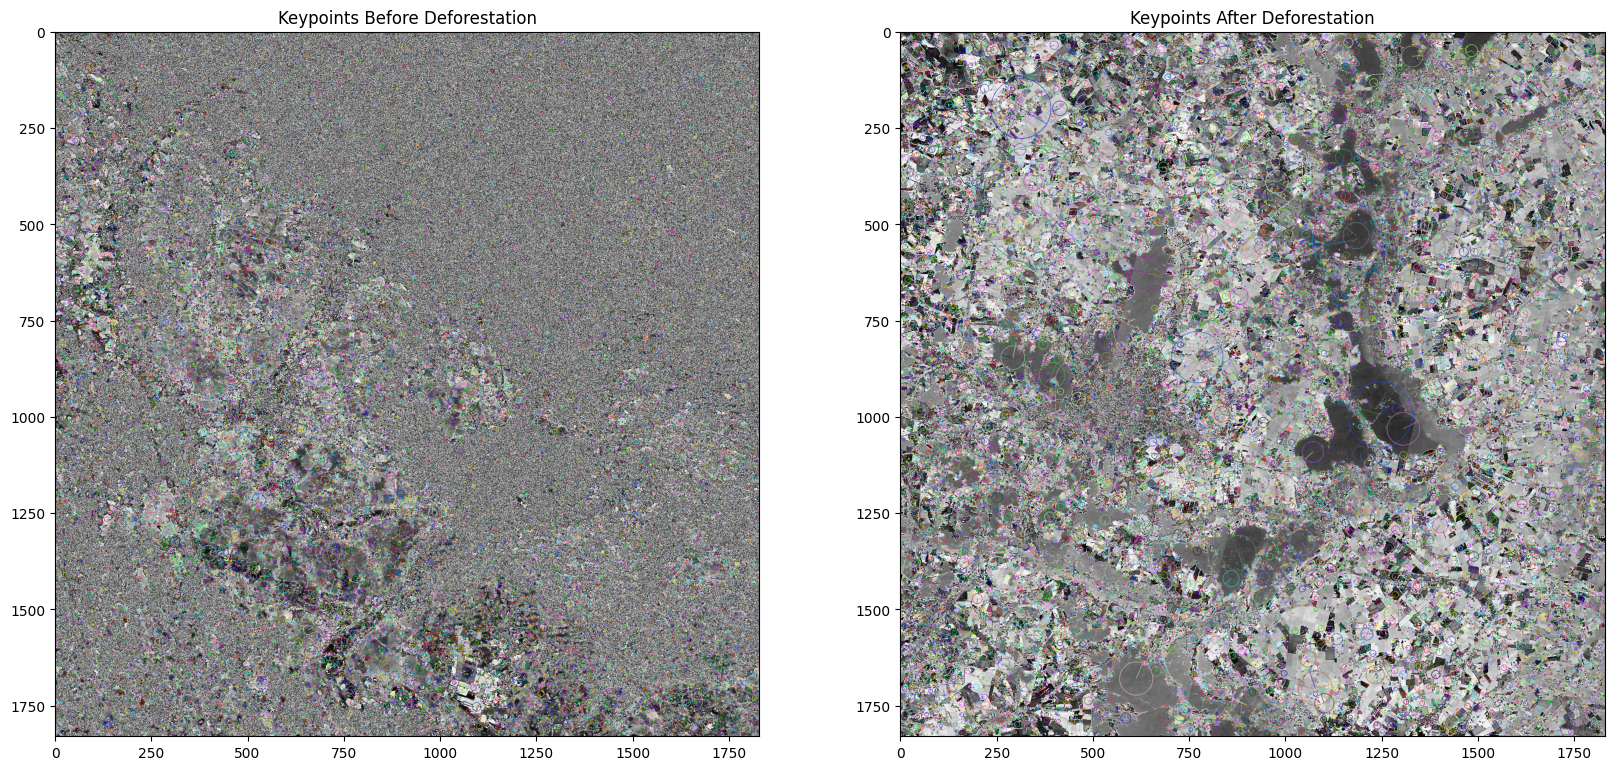

In [5]:
# Візуалізація ключових точок
img_before_kp = cv2.drawKeypoints(image_before_opencv, kp_before, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img_after_kp = cv2.drawKeypoints(image_after_opencv, kp_after, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

import matplotlib.pyplot as plt

# Відображення зображень із ключовими точками
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img_before_kp, cmap='gray')
plt.title("Keypoints Before Deforestation")

plt.subplot(1, 2, 2)
plt.imshow(img_after_kp, cmap='gray')
plt.title("Keypoints After Deforestation")

plt.show()

Цей код відображає ключові точки, знайдені на зображеннях "До" та "Після", використовуючи функцію drawKeypoints із OpenCV.

Розділ 5: Порівняння ключових точок

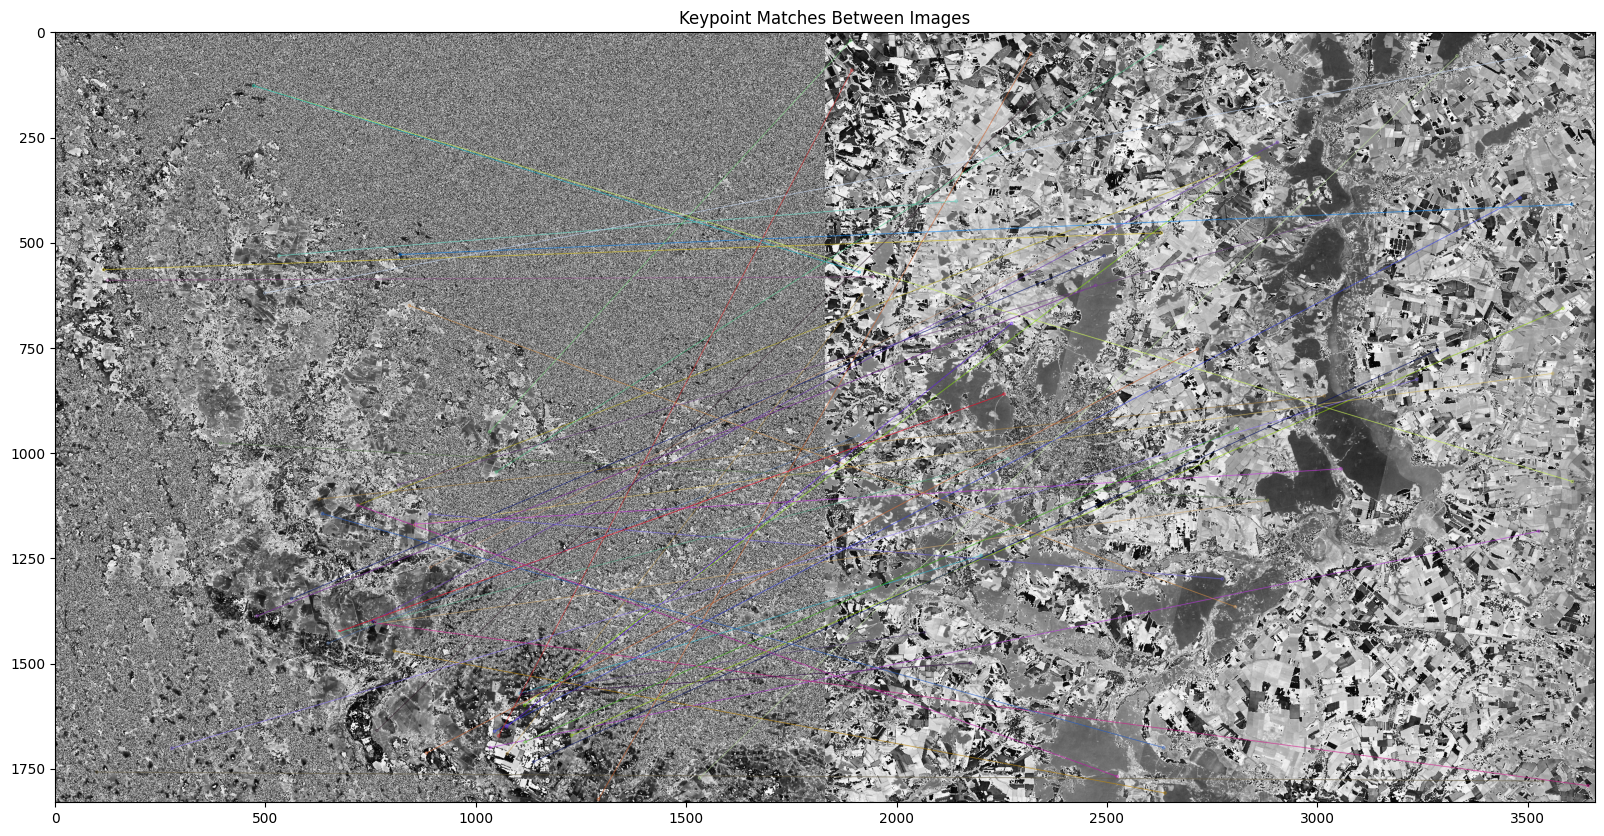

Number of Matches: 11629


In [6]:
# Ініціалізація Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Пошук співпадінь між дескрипторами
matches = bf.match(desc_before, desc_after)

# Сортування співпадінь за відстанню
matches = sorted(matches, key=lambda x: x.distance)

# Візуалізація співпадінь
img_matches = cv2.drawMatches(image_before_opencv, kp_before, image_after_opencv, kp_after, matches[:50], None, flags=2)

plt.figure(figsize=(20, 10))
plt.imshow(img_matches)
plt.title("Keypoint Matches Between Images")
plt.show()

# Виведення кількості співпадінь
print(f"Number of Matches: {len(matches)}")

Тут використовуються дескриптори, знайдені SIFT, для знаходження співпадінь між двома зображеннями. Потім вони візуалізуються за допомогою drawMatches.